In [120]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris=load_iris()
df= pd.DataFrame(iris.data,columns =iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [121]:
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [122]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [123]:
#lets cluster them based on petals size and width
#for using K means we must import the KMeans from sklearn
from sklearn.cluster import KMeans
km=KMeans()



In [124]:
#lets use the elbow method to find the correct valueof K for the data set
X= df[['petal length (cm)', 'petal width (cm)']]
k_range= range(1,11)
SSE =[]  # Sum of square errors
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(X)
    SSE.append(km.inertia_)

In [125]:
SSE

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.040239971910452,
 9.244804827285606,
 7.68028529657477,
 6.592736809084634,
 5.72802503052503]

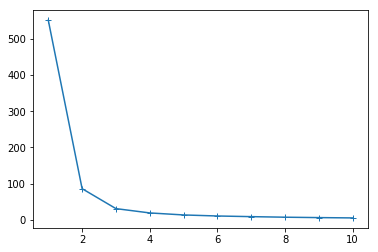

In [126]:
#lets plot K values and SSE the ELbow method
plt.plot(k_range,SSE,marker="+")

In [127]:
# we can see the value of k at ELBOW is 3

In [128]:
km=KMeans(n_clusters=3)


In [129]:
y_predict=km.fit_predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [130]:
df["predict"]=y_predict
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [131]:
#lets divide thedata sets based on predicts so that we can plot them on scatter plot
df0= df[df["predict"]==0]
df1= df[df["predict"]==1]
df2= df[df["predict"]==2]

In [132]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

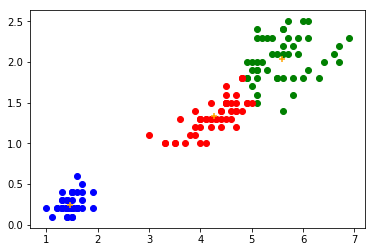

In [133]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="orange",marker ="+")


